Model is trained to predict the owner is

Importing all the necessary libraries

In [107]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  #for accuracy calculation

Understanding the Dataset

In [108]:
df = pd.read_csv("Training Data.csv")

In [109]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [110]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [112]:
df.columns= df.columns.str.lower()

In [113]:
df.columns

Index(['id', 'income', 'age', 'experience', 'married/single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [114]:
#Drop irrelevant columns
notRelevant = ['id','city','state','profession']

df = df.drop(notRelevant,axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   income             252000 non-null  int64 
 1   age                252000 non-null  int64 
 2   experience         252000 non-null  int64 
 3   married/single     252000 non-null  object
 4   house_ownership    252000 non-null  object
 5   car_ownership      252000 non-null  object
 6   current_job_yrs    252000 non-null  int64 
 7   current_house_yrs  252000 non-null  int64 
 8   risk_flag          252000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 17.3+ MB


Preprocessing data

In [116]:
#checking for duplicate entries
df.duplicated().sum()

208810

In [117]:
#Checking for any missing values in data
df.isnull().sum()

income               0
age                  0
experience           0
married/single       0
house_ownership      0
car_ownership        0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

In [118]:
df.isna().sum()

income               0
age                  0
experience           0
married/single       0
house_ownership      0
car_ownership        0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

In [119]:
#Using
df['married/single'].value_counts()

single     226272
married     25728
Name: married/single, dtype: int64

In [120]:
df['house_ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

In [121]:
df['car_ownership'].value_counts()

no     176000
yes     76000
Name: car_ownership, dtype: int64

Using label encoding to convert categorical data into integer format

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
#encoding binary data
label_encoder = LabelEncoder()
for col in ['married/single','car_ownership']:
  df[col] = label_encoder.fit_transform( df[col] )

In [124]:
df

,income,age,experience,married/single,house_ownership,car_ownership,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,1,rented,0,3,13,0
1,7574516,40,10,1,rented,0,9,13,0
2,3991815,66,4,0,rented,0,4,10,0
3,6256451,41,2,1,rented,1,2,12,1
4,5768871,47,11,1,rented,0,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,rented,0,6,11,0
251996,2843572,26,10,1,rented,0,6,11,0
251997,4522448,46,7,1,rented,0,7,12,0
251998,6507128,45,0,1,rented,0,0,10,0


Using one hot encoding to encode categorical data having multiple values

In [125]:
from sklearn.preprocessing import OneHotEncoder

In [126]:
onehot_encoder = OneHotEncoder(sparse_output = False)
df['house_ownership'] = onehot_encoder.fit_transform(df['house_ownership'].values.reshape(-1, 1) )

In [127]:
df

,income,age,experience,married/single,house_ownership,car_ownership,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,1,0.0,0,3,13,0
1,7574516,40,10,1,0.0,0,9,13,0
2,3991815,66,4,0,0.0,0,4,10,0
3,6256451,41,2,1,0.0,1,2,12,1
4,5768871,47,11,1,0.0,0,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,0.0,0,6,11,0
251996,2843572,26,10,1,0.0,0,6,11,0
251997,4522448,46,7,1,0.0,0,7,12,0
251998,6507128,45,0,1,0.0,0,0,10,0


**Model generation**

Splitting the data into train and test sets

In [128]:
#Spliting features and label

x = df.drop("risk_flag", axis=1) #features
y = df["risk_flag"] #label

In [129]:
#For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

**Creating a Decision Tree model**

In [130]:
#Creating decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Training over train data
clf = clf.fit(x_train,y_train)

#predicting response for test data
y_pred = clf.predict(x_test)

In [131]:
#Evaluating model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8770634920634921


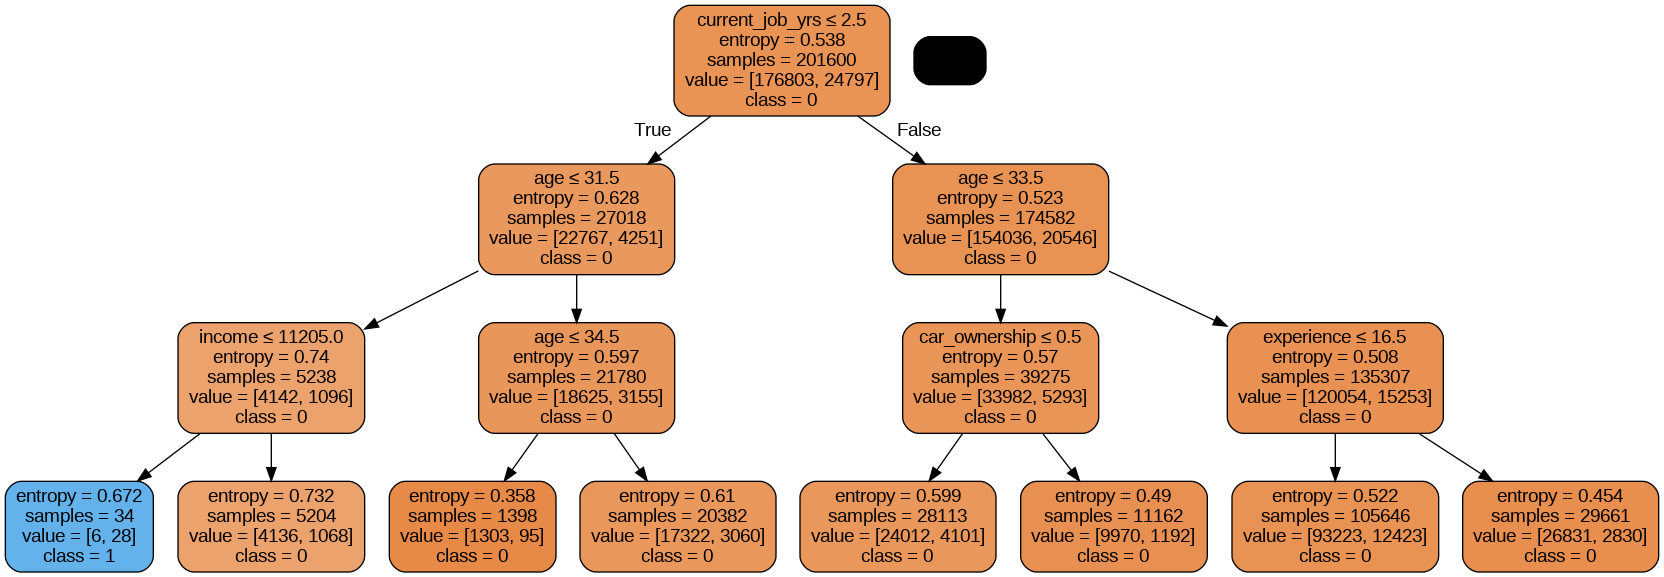

In [132]:
feature_cols = df.columns.drop('risk_flag')

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('risk.png')
Image(graph.create_png())

Using random forest

In [133]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [134]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1)

model = RandomForestClassifier()

In [135]:
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [136]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [137]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8612896825396825
